In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

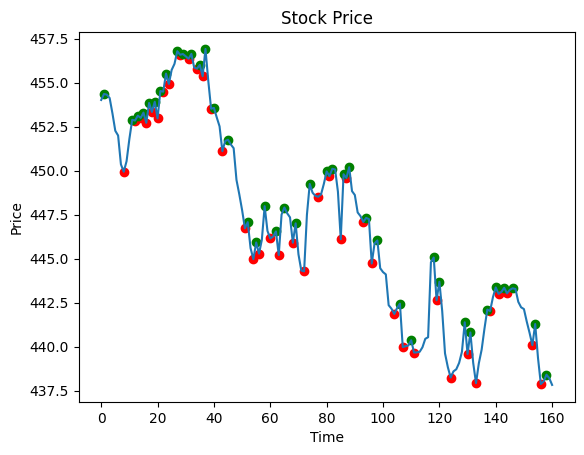

In [13]:
# Read the stock price data from the file
data = []
# with open('SPY_30min_sample.txt', 'r') as file:
with open('SPY_1hour_sample.txt', 'r') as file:
    for line in file:
        timestamp, a, b, c, price, d = line.strip().split(',')
        data.append((timestamp, float(price)))

# Extract the prices from the data
prices = [price for _, price in data]

# Find the secondary high points
secondary_high_points = []
past_secondary_high = prices[0]

secondary_low_points = []
past_secondary_low = prices[0]

past_high = prices[0]
past_low = prices[0]

is_increasing = (prices[1] > prices[0])

turning_up_point = []
turning_down_point = []

# turning_point.append((0, prices[0]))

for i in range(2, len(prices) - 1):
    if prices[i] < prices[i - 1] and prices[i - 1] > prices[i - 2]:
        turning_down_point.append((i - 1, prices[i - 1]))
        pass # from up to down, but trend still need check
    elif prices[i] > prices[i - 1] and prices[i - 1] < prices[i - 2]:
        turning_up_point.append((i - 1, prices[i - 1]))
        pass # from down to up, but trend still need check

# Mark all turning points
for i, p in turning_up_point:
    plt.scatter(i, p, color='red')

for i, p in turning_down_point:
    plt.scatter(i, p, color='green')

# Mark the secondary high points as red dots
# for i, p in secondary_high_points:
#     plt.scatter(i, p, color='red')

# for i, p in secondary_low_points:
#     plt.scatter(i, p, color='green')

# Show the plot
plt.plot(prices)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price')
plt.show()
